In [86]:
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
data_path = 'data/'

df = pd.read_csv(os.path.join(data_path, 'train_classes.csv'))

df_copy = df.copy()

tags = df['tags'].apply(lambda x: x.split(' '))
tags_flatten = [item for sublist in tags for item in sublist]
labels = list(set(tags_flatten))
df_copy['tags'] = tags
df_copy2 = df_copy.copy()

for tag in labels:
    df_copy[tag] = df_copy['tags'].apply(lambda tags: 1. if tag in tags else 0.)
df_copy = df_copy.drop(['tags'],axis=1)


In [12]:
from src.dataset import AmazonForestDataset

In [13]:

dataset = AmazonForestDataset(df=df_copy,
                              image_folder='data/train-jpg/')

NameError: name 'df_copy' is not defined

In [ ]:
dataset.df

,image_name,cloudy,partly_cloudy,blooming,primary,water,agriculture,artisinal_mine,cultivation,haze,blow_down,slash_burn,conventional_mine,selective_logging,road,bare_ground,clear,habitation
0,train_0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,train_2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,train_3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,train_4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40475,train_40475,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40476,train_40476,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40477,train_40477,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [108]:
im, label = dataset[567]

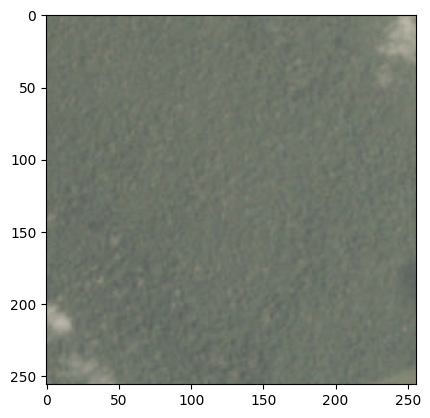

In [109]:
plt.imshow(im)

In [101]:
df_copy.drop(['image_name'], axis=1).iloc[567]

cloudy               0.0
partly_cloudy        0.0
blooming             0.0
primary              1.0
water                0.0
agriculture          1.0
artisinal_mine       0.0
cultivation          1.0
haze                 0.0
blow_down            0.0
slash_burn           0.0
conventional_mine    0.0
selective_logging    0.0
road                 0.0
bare_ground          0.0
clear                1.0
habitation           0.0
Name: 567, dtype: float64

In [102]:
label

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
      dtype=float32)

<BarContainer object of 17 artists>

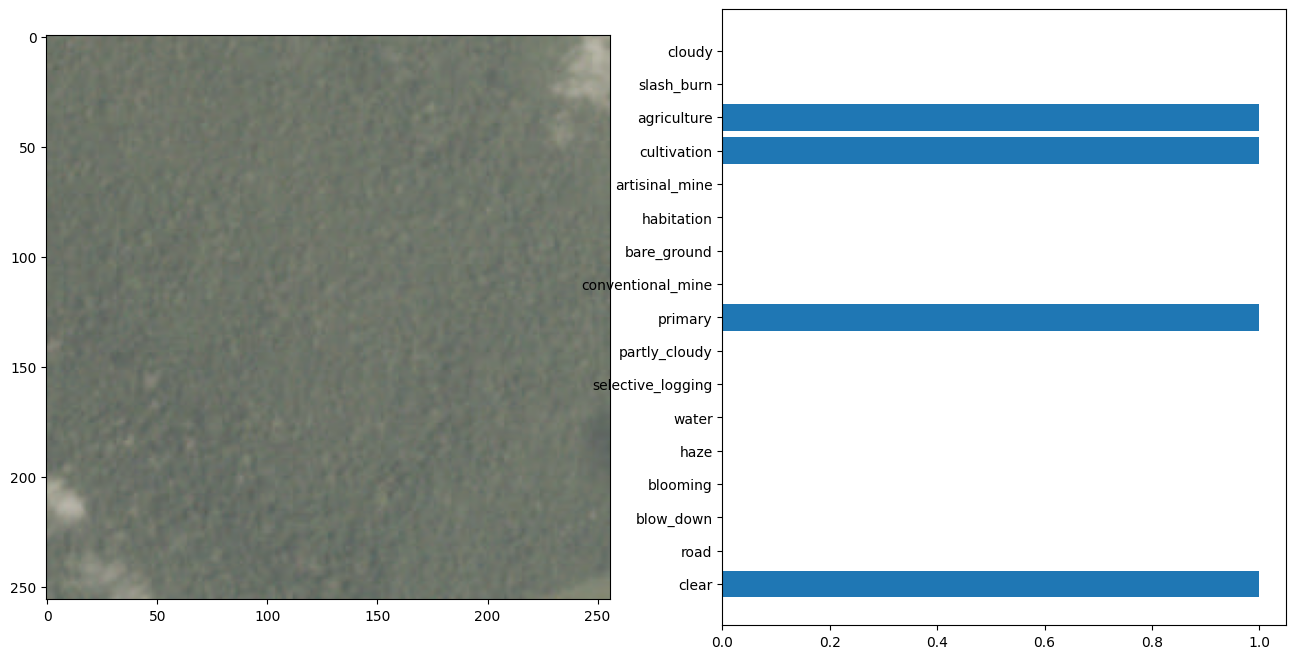

In [81]:
_, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(im)
ax[1].barh(labels, label)

In [110]:
from src.datamodule import AmazonForestDM

In [ ]:
dm = AmazonForestDM(
    
)

In [95]:
from src.data_splitter import stratify_shuffle_split_subsets

In [101]:
a, b, c= stratify_shuffle_split_subsets(
    full_dataset=df_copy,
    train_fraction=0.7
)

In [100]:
a.shape, b.shape, c.shape

((32403, 18), (4028, 18), (4048, 18))

In [102]:
a.shape, b.shape, c.shape

((28308, 18), (6091, 18), (6080, 18))

In [103]:
df_copy.shape

(40479, 18)

In [104]:
28308 + 6091 + 6080

40479

In [105]:
a.head()

,image_name,clear,road,blow_down,blooming,haze,water,selective_logging,partly_cloudy,primary,conventional_mine,bare_ground,habitation,artisinal_mine,cultivation,agriculture,slash_burn,cloudy
0,train_0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train_4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,train_6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,train_7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
df_copy.head()

,image_name,clear,road,blow_down,blooming,haze,water,selective_logging,partly_cloudy,primary,conventional_mine,bare_ground,habitation,artisinal_mine,cultivation,agriculture,slash_burn,cloudy
0,train_0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train_1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,train_2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train_4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1]:
df_copy

NameError: name 'df_copy' is not defined

In [14]:
from configs.config import Config
from pprint import pprint

In [15]:
c = Config.from_yaml('configs/config.yaml')

In [18]:
os.path.join('a', 'b', 'c')

'a\\b\\c'

In [114]:
from src.datamodule import AmazonForestDM

In [115]:
dm = AmazonForestDM(
    config=c.data_config
)

In [122]:
dm.setup('fit')

In [124]:
a = dm.train_dataset

In [125]:
im, label = a[123]

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


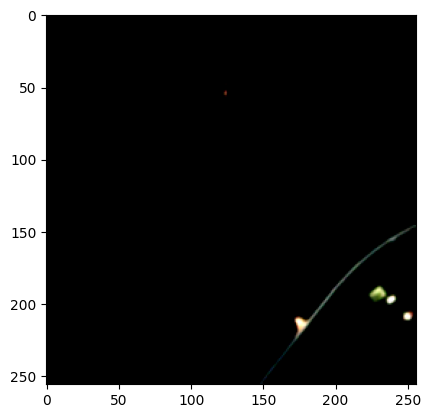

In [143]:
cc = im.permute(1,2,0).detach().numpy()
plt.imshow(cc)

In [2]:
from src.constants import PROJECT_PATH

In [69]:
import torch

In [10]:
from src.helpers import load_object
from configs.config import Config
from src.losses import get_losses

In [11]:
config = Config.from_yaml('configs/config.yaml')

In [1]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [3]:
list_files('data')

data/
    df_encoded.csv
    test_df.csv
    train_classes.csv
    train_df.csv
    valid_df.csv
    train-jpg/
        train_0.jpg
        train_1.jpg
        train_10.jpg
        train_100.jpg
        train_1000.jpg
        train_10000.jpg
        train_10001.jpg
        train_10002.jpg
        train_10003.jpg
        train_10004.jpg
        train_10005.jpg
        train_10006.jpg
        train_10007.jpg
        train_10008.jpg
        train_10009.jpg
        train_1001.jpg
        train_10010.jpg
        train_10011.jpg
        train_10012.jpg
        train_10013.jpg
        train_10014.jpg
        train_10015.jpg
        train_10016.jpg
        train_10017.jpg
        train_10018.jpg
        train_10019.jpg
        train_1002.jpg
        train_10020.jpg
        train_10021.jpg
        train_10022.jpg
        train_10023.jpg
        train_10024.jpg
        train_10025.jpg
        train_10026.jpg
        train_10027.jpg
        train_10028.jpg
        train_10029.jpg
        train_10

In [6]:
os.getcwd()

'c:\\Users\\kuweg\\VSCode\\modeling'

In [9]:
from src.training_module import AmazonForestClassifier

In [ ]:
m = AmazonForestClassifier()

In [1]:
import torch

In [6]:
exp_path = 'experiments/exp3/epoch_epoch=01 - val_f1=0.494.ckpt'

a = torch.load(exp_path)

In [8]:
a.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'hparams_name', 'hyper_parameters'])

In [9]:
exp_path = 'experiments/epoch_epoch=09 - val_f1=0.642.ckpt'

a = torch.load(exp_path)
a.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])